## Final Project Submission

Please fill out:
* Student name: Deon Durrant
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Mark  Bardour
* Blog post URL:https://medium.com/@durrantdeon/basics-of-ensemble-methods-beb0b2aa250d


# Business and Data Understanding

## Problem Statement

SyriaTel, a major telecommunications provider, is interested in minimizing resources expended on customers who are likely to terminate their services, a phenomenon known as churn.  Customers' churn  intentions maybe predictive by identifing and isolating patterns hidden in the data. 

## Data Understanding 

To tackle the business problem  I will diligently search for a classifier to  inveil predictive patterns indicating customer inclination to discontinue doing business with SyriaTel. This  constitutes a binary classification endeavor.
 
**Classifiers**

Various classifiers and evalaution metrics will be used to objectively select the most suitable model for addressing the business problem. The following  classifiers will be utilized:  

*  Logistic Regression, 
* Decision Tree
* KNeighbors Classifier
* Random Forest  Classifier

 **Evaluation Metrics**
 
 To assess model performance objectively, the following evaluation metrics will be considered:
* Precision
* Recall
* Accuracy
* F1 score
* AUC Score
* Confusion Matrices

In [1]:
# Import essential libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score  
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1)


# Exploratory Data Analysis 
- Examine and sanitize the data
- Handle missing data appropriately
- Investigate data attributes
- Rectify typos, inconsistencies in capitalization, and naming conventions
- Analyze the distribution of variables 

In [2]:
# Import and inspect the data
import pandas as pd
df = pd.read_csv('data/telcom_data.csv')  
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Indentify and list the columns 
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.shape

(3333, 21)

In [5]:
#  Obtain a concise summary of the overall structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Overview of the numerical features of the dataset
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# Summary of data structure 
- 3333 entries, 21 columns 
- dtypes: bool(1), float64(8), int64(8), object(4)
- no missing data
- Columns
    - State                   
    - Account length            
    - Area code                 
    - phone number              
    - international plan        
    - voice mail plan           
    - number vmail messages     
    - total day minutes         
    - total day calls           
    - total day charge          
    - total eve minutes        
    - total eve calls           
    - total eve charge          
    - total night minutes       
    - total night calls         
    - total night charge        
    - total intl minutes        
    - total intl calls          
    - total intl charge         
    - customer service calls    
    - Churn* 
    
  **Churn = the number of subscribers that leave the company** 

**To ensure a robust response to the business query and deliver practical recommendations:**

* Prioritize analysis of customer behavior and their tendency to continue as subscribers of Syriatel.

* Delve into  the data features for predictive patterns that can inform  resource allocation desicions. 

* Investigate telephone usage patterns and customer churn correlations.  

* Assess market segmentation to align with the company's goals of enhancing subscriber retention


In [7]:
# Convert data type to int
df['churn']= df['churn'].astype('int')
#converting 'area code' datatype
df["area code"] = df["area code"].astype(object)

In [8]:
# Drop unneccesary columns
df.drop(['phone number','state' ], axis =1, inplace=True)
df.head(5)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Variables Distribution Analysis**


In [9]:
# Churn Distribution Analysis
churn_count=df['churn'].value_counts()
churn_count

0    2850
1     483
Name: churn, dtype: int64

In [10]:
# Calculate churn rate
num_churned = df['churn'].sum()
total_customers = len(df)

churn_rate = num_churned / total_customers

print(f"Churn Rate: {churn_rate}")

Churn Rate: 0.14491449144914492


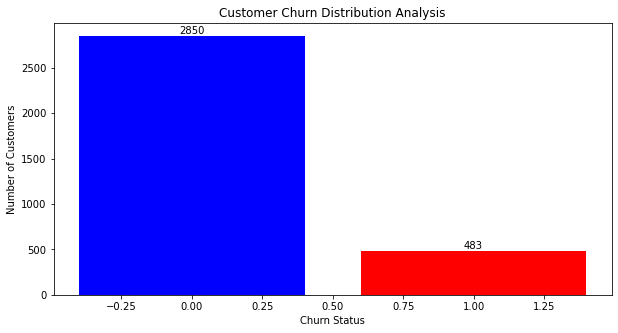

In [11]:
  # Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(churn_count.index, churn_count.values, color=['blue', 'red'])

# Add text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, '%d' % yval, va='bottom', ha='center')

plt.title('Customer Churn Distribution Analysis')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()


**Churn Distribution Analysis**
* 483 instances labeled as "1"  (churned) is significantly lower than those labeled as "0" (2850) (not churned), this indicating a class imbalance in the churn variable
* SyriaTel has a churn rate of 14.49% 

Business Implication 

* negatively impact Monthly Recurring Revenue (MRR)
* indicative of  dissatisfaction with the  service
* failure to renew subscription (subscription model)

Modeling Implication 

* This imbalance can affect the performance of machine learning models
* The business problems require classifiers, these are sensitive to class distribution.

To address the imbalance issues resampling such as SMOTE will be considered

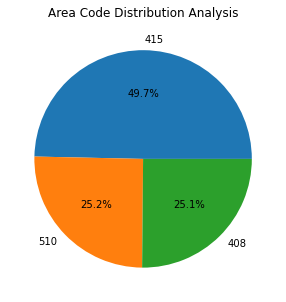

In [12]:
# Area Code Distribution Analysis
# Create plot
area_code = df['area code'].value_counts()

# Create plot
plt.figure(figsize=(10, 5))
area_code.plot(kind='pie', autopct='%1.1f%%')  
plt.title('Area Code Distribution Analysis')
plt.ylabel('')  

# Show the plot
plt.show()


**Area Code Distribution Analysis**
- 49.7% almost half of the customers are from 415 area code
- 25% of the customers are in area code 510 and another 25% in area code 408

Text(0.5, 1.0, 'Customer Service Calls Area Code Churn')

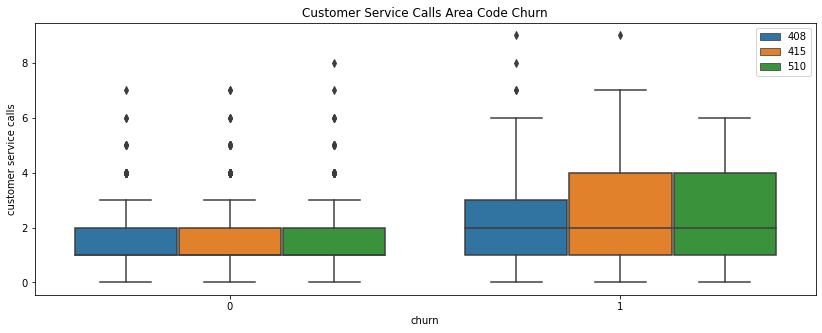

In [13]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');
plt.title('Customer Service Calls Area Code Churn' )

**Customer Service Calls Churn Analysis**
* Customers who did not churn tend to have fewer customer service calls (median 1 to 2 calls)  across  area codes 408, 415, and 510.
* Customers who churned show a higher number of customer service calls (median 2 to 3 calls) in all area codes. 
* Customers who make more service calls are more likely to churn
* Variablity is evident in not churn and churn customers(length of whiskers)
* More outliers in the churned group especially in the 408 area code

Business implication 
* Mitigate churn utilizing  proactive intervention strategies
* Opportunity to improve customer support 

In [14]:
# International Subscribers  Churn  Distribution
intl_plan_churn= df[['international plan', 'churn']].value_counts()
intl_plan_churn

international plan  churn
no                  0        2664
                    1         346
yes                 0         186
                    1         137
dtype: int64

<Figure size 720x360 with 0 Axes>

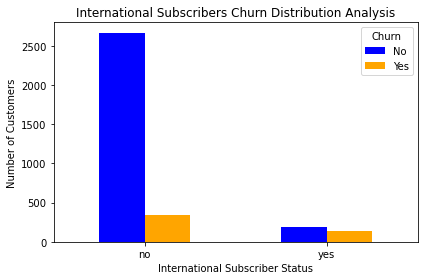

In [15]:
# Create a cross-tabulation
intl_plan_churn = pd.crosstab(index=df['international plan'], columns=df['churn'])

# Create plot
plt.figure(figsize=(10, 5))
intl_plan_churn.plot(kind='bar', color=['blue', 'orange'], stacked=False)  
plt.title('International Subscribers Churn Distribution Analysis')
plt.xlabel('International Subscriber Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  
plt.legend(title='Churn', labels=['No', 'Yes'])  
plt.tight_layout() 

**International Subscribers  Churn  Distribution**

* Out of the 3333 subscribers only 346 has an international plan about 10.38%

* 39.56% of international plans subscribers terminate the service 

In [16]:
# Customer Loyalty Churn Analysis
account_len_churn= df[['account length', 'churn']].value_counts()


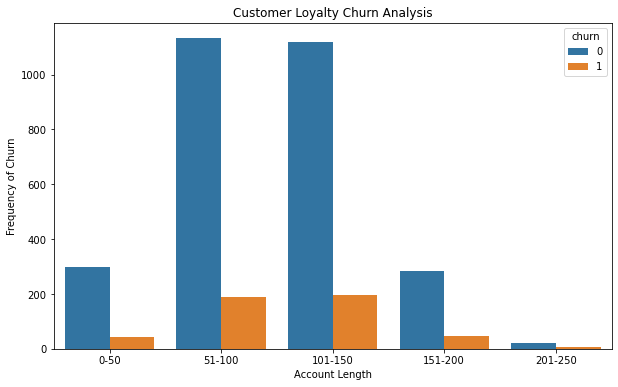

In [17]:
# Visualize the distribution 
# Calculate the frequency of each 'account length' and 'churn' combination
account_len_churn = df.groupby(['account length', 'churn']).size().reset_index(name='frequency')

# Define bins and labels 'account length' binning
bins = [0, 50, 100, 150, 200, 250]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250']

# Add the binned 'account length' in a new DataFrame
account_len_churn['length_bins'] = pd.cut(account_len_churn['account length'], bins=bins, labels=labels)

# Aggregate the frequency data by bins and churn status
bin_counts = account_len_churn.groupby(['length_bins', 'churn'])['frequency'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_counts, x='length_bins', y='frequency', hue='churn')
plt.title('Customer Loyalty Churn Analysis')
plt.xlabel('Account Length')
plt.ylabel('Frequency of Churn')
plt.show()


**Customer Loyalty Churn Analysis**
* Customer Loyalty= Account length,  how long customers has been with SyriaTel
* high risk groups identified for customer duration between 51- 150
* account lengths decline significantly after 150 days


In [18]:
# Voice Mail Subscribers  Churn  Distribution
vm_plan_churn= df[['voice mail plan', 'churn']].value_counts()
vm_plan_churn

voice mail plan  churn
no               0        2008
yes              0         842
no               1         403
yes              1          80
dtype: int64

<Figure size 720x360 with 0 Axes>

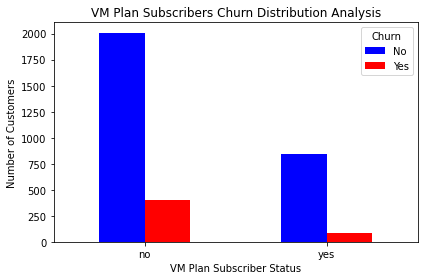

In [19]:
# Visualize voice mail plan and churn status 
vm_plan_churn = pd.crosstab(index=df['voice mail plan'], columns=df['churn'])

# Create plot
plt.figure(figsize=(10, 5))
vm_plan_churn.plot(kind='bar', color=['blue', 'red'], stacked=False)  
plt.title('VM Plan Subscribers Churn Distribution Analysis')
plt.xlabel('VM Plan Subscriber Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  
plt.legend(title='Churn', labels=['No', 'Yes'])  
plt.tight_layout()  

**Voice Mail Subscribers  Churn  Distribution**

- For customers without a voice mail plan: Churn percentage = 16.73%

- For customers with a voice mail plan: Churn percentage = 8.67%

**Usage Churn  Analysis**

In [20]:
daytime_churn= df[['total day charge', 'churn']].sum()
daytime_churn

total day charge    101864.17
churn                  483.00
dtype: float64

In [21]:
churn_counts = df['churn'].value_counts()

# Calculate the sum of total day, evening and night  charge,  for churned and non-churned customers
daytime_churn = df.groupby('churn')['total day charge'].sum()
eveningtime_churn = df.groupby('churn')['total eve charge'].sum()
nighttime_churn = df.groupby('churn')['total night charge'].sum()
# Print the counts and the sums
print(f"Churn counts:\n{churn_counts}")
print(f"Total Day Charge by churn status:\n{daytime_churn}")
print(f"Total Evening Charge by churn status:\n{eveningtime_churn}")
print(f"Total Night Charge by churn status:\n{nighttime_churn}")

Churn counts:
0    2850
1     483
Name: churn, dtype: int64
Total Day Charge by churn status:
churn
0    84874.20
1    16989.97
Name: total day charge, dtype: float64
Total Evening Charge by churn status:
churn
0    48218.89
1     8720.55
Name: total eve charge, dtype: float64
Total Night Charge by churn status:
churn
0    25667.31
1     4460.76
Name: total night charge, dtype: float64


Evening rate: 0.08500506585612969
Night rate: 0.044993870044953005
Day rate: 0.1700113164843455


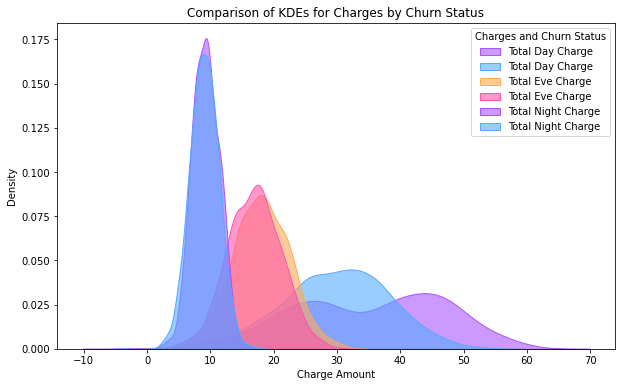

In [22]:
# Compare churn and telephone charges across different times of the day.
#Create rates
eve_rate = df['total eve charge'] / df['total eve minutes']
intl_rate = df['total night charge'] / df['total night minutes']
day_rate = df['total day charge'] / df['total day minutes']
print(f"Evening rate: {eve_rate [0]}")
print(f"Night rate: {intl_rate [0]}")
print(f"Day rate: {day_rate [0]}")

# Create KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='total day charge', hue='churn', fill=True, palette="cool", common_norm=False, alpha=0.6,  label='Total Day Charge')
sns.kdeplot(data=df, x='total eve charge', hue='churn', fill=True, palette="spring", common_norm=False, alpha=0.6,  label='Total Eve Charge')
sns.kdeplot(data=df, x='total night charge', hue='churn', fill=True, palette="cool", common_norm=False, alpha=0.6,  label='Total Night Charge')

plt.title('Comparison of KDEs for Charges by Churn Status')
plt.xlabel('Charge Amount')
plt.ylabel('Density')
plt.legend(title='Charges and Churn Status')
plt.show()
    

**Day Usage Churn**

- Bimodal distribution for both churned and non-churned customers
- Churned customers have two distinctive peaks indicating different customer behavior within the subset
- Overlapping of churn and non-churn indicating the subsets may share similar caharecteristics
- Day rate = 0.17

**Evening Usage Churn**

- Non-churned has a peak that is slightly left compared to the peak of the distribution for churned customers .
- Non-churned has a tail that extends further to the right, suggesting higher total evening charge for some non-churned customers.
- Churned distribution tapers off more quickly, indicating that higher total evening charges are less common for churned customers.
- Evening  rate = 0.085

**Night Usage Churn**

- High degree of overlapping suggesting feature is not distinguishing churn and not-churn
- This variable may not be a strong predictor of churn
-  Day rate = 0.045

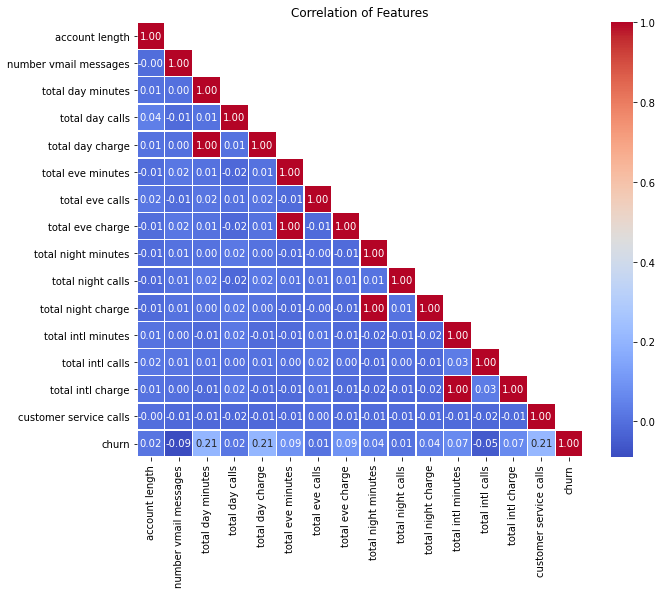

In [23]:
# Features correlation analysis
# Visualize the correlation between variables
corr_matrix =df.corr()
 # Generate a mask to only show the bottom triangle
corr_matrix= corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
# Plot 
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,  linewidths=0.5)
plt.title('Correlation of Features')  
plt.show()

**Features Correlation Analysis**
* The correlation values for **churn** seems to fall  below 0.3 for all features. 
* Multiple variables are uncorrelated 

The following are perfectly corrrelated due to the direct relationship between charge and usage minutes
* Total intl charge and total intl minutes
* Total night charge and total night minutes
* Total eve charge and total eve minutes
* Total day charge and total day minutes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   object 
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

# Preprocessing

Prepare data for modeling

In [25]:
# Create dummy variables
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns into dummy variables
dummies = pd.get_dummies(df[categorical_cols])

# Concatenate dummy variables with numerical columns
df_final = pd.concat([df[numerical_cols], dummies], axis=1)

# Print the new DataFrame
df_final

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge,churn,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,0,0,1,0,1,0,0,1
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,0,0,1,0,1,0,0,1
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,0,1,0,1,0,1,0
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,0,1,0,0,0,1,1,0
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,156.2,26.55,215.5,18.32,279.1,12.56,9.9,2.67,0,0,1,0,1,0,0,1
3329,231.1,39.29,153.4,13.04,191.3,8.61,9.6,2.59,0,0,1,0,1,0,1,0
3330,180.8,30.74,288.8,24.55,191.9,8.64,14.1,3.81,0,0,0,1,1,0,1,0
3331,213.8,36.35,159.6,13.57,139.2,6.26,5.0,1.35,0,0,0,1,0,1,1,0


## Create training and testing sets

- Define the predictor and target variables
- Perform a standard train-test split. 
- Assign 30% to the test set 
- Set random_state ensuring  that the split is reproducible

In [26]:
# Create output and input variable
y= df_final['churn']
X= df_final.drop(['churn' ], axis=1)


In [27]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Evaluate class imbalance**


In [28]:

# Training set
print('Train:\n')
print(y_train.value_counts())

# Test set
print('Test:\n')
print(y_test.value_counts())

Train:

0    1993
1     340
Name: churn, dtype: int64
Test:

0    857
1    143
Name: churn, dtype: int64


**Class Imbalance evaluation**
- In the training set the proportion  of churned customers to not churned  is 340 to 1993
- In the testing  set the proportion  of churned customers to not churned  is 143 to 857
- To address class imbalance Synthetic Minority Oversampling is used 

In [29]:
# Address class imbalance using SMOTE 
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())


0    1993
1     340
Name: churn, dtype: int64


1    1993
0    1993
Name: churn, dtype: int64


**Scaling**
 * Transform the numerical features of the dataset to a similar scale 

In [30]:
# Scale the training set 
# Instantiate MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit scaler to X-train
scaler.fit(X_train)
#Transform scaler 
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),  
    index=X_train.index,
    columns=X_train.columns)  
X_train_scaled.head(5)

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
2016,0.580476,0.580485,0.715425,0.715626,0.414739,0.414824,0.460,0.459259,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1362,0.378559,0.378503,0.184218,0.184406,0.369016,0.369396,0.495,0.494444,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2670,0.634515,0.634484,0.415177,0.415400,0.419042,0.419605,0.450,0.450000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2210,0.802731,0.802632,0.522958,0.523132,0.623991,0.624029,0.585,0.585185,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1846,0.509297,0.509228,0.481441,0.481398,0.371436,0.371787,0.575,0.575926,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [31]:
# Scale the testing set 
# fit scaler to X-test
scaler.fit(X_test)
#Transform scaler 
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),  
    index=X_test.index,
    columns=X_test.columns)  
X_test_scaled.head(5)

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,0.441847,0.441818,0.965495,0.965478,0.449691,0.449246,0.714286,0.715686,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2674,0.311003,0.311033,0.600451,0.600531,0.446605,0.446502,0.677249,0.678431,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1345,0.000000,0.000000,0.414060,0.414264,0.380864,0.380658,0.359788,0.360784,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1957,0.606613,0.606640,0.557562,0.557663,0.347222,0.347051,0.539683,0.539216,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2148,0.410490,0.410463,0.623992,0.624052,0.567901,0.567901,0.529101,0.529412,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## 2. Modeling

##   Model Development 1: Logistic Regression

Build and evaluate a baseline LogisticRegression



In [32]:
# Instantiate the model
logreg = LogisticRegression(C=1e12, solver = 'liblinear', fit_intercept=False,)

# Fit the model
Base_model= logreg.fit(X_train_scaled, y_train)

In [33]:
# Predictions using train and test set
y_hat_train=logreg.predict(X_train_scaled)
y_hat_test= logreg.predict(X_test_scaled)

# Evaluation of the models
The following metrics will be used to evaluate the classifiers for both the training and test sets.
 - Precision: measures how accurate the positive predictions are.
 - Recall:  measures the model's ability to find all the relevant cases (positive cases)
 - Accuracy: 
     - measures the overall correctness of the model
     - most common metric for classification,  providing a solid holistic view of the overall performance of our model.
 - F1 score:  
     - Harmonic Mean of Precision and Recall,providing a single measure of efficacy
    - This means that the F1 score cannot be high without both precision and recall also being high. 
    - High model's F1 score indicates the  model is doing well all around
    
- AUC Score: reflects the model's ability to distinguish between classes.
 
**AUC ROC curve:**

 -  Plots the true positive rate (sensitivity) on the y-axis against the false positive rate (1 - specificity) on the x-axis.
 -  ROC curve evaluates how well the model discriminates between classes
 -  Instrumental in comparing the effectiveness of different models

   **Evaluate the Logistic Regression predictive performance**
  
   

In [34]:
# Snapshot of comprehensive metrics
classification_report_train = classification_report(y_train, y_hat_train)
print("Classification Report (Training Set):\n", classification_report_train)

classification_report_test = classification_report(y_test, y_hat_test)
print("Classification Report (Testing Set):\n", classification_report_test)

## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm = confusion_matrix(y_test,y_hat_test )
print('Confusion Matrix:\n', cm)

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1993
           1       0.54      0.13      0.21       340

    accuracy                           0.86      2333
   macro avg       0.71      0.56      0.57      2333
weighted avg       0.82      0.86      0.82      2333

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.59      0.17      0.26       143

    accuracy                           0.86      1000
   macro avg       0.73      0.57      0.59      1000
weighted avg       0.83      0.86      0.83      1000

Confusion Matrix:
 [[840  17]
 [119  24]]


In [35]:
# Probability scores for test set
y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Print AUC
print('Logistic Regression AUC: {}'.format(auc(fpr, tpr)))

Logistic Regression AUC: 0.7438127799854755


# Model Development 2: DecisionTreeClassifier

In [36]:
# Instantiate and fit the  classifier 
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth = 5)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [37]:
# Make predictions using train and test  set
dt_hat_train= dt.predict(X_train_scaled)
y_pred = dt.predict(X_test_scaled)

**Evaluate the DecisionTreeClassifier predictive performance**

In [38]:
# Evaluate using the AUC ROC curve

# First calculate the probability scores of each of the datapoints:
y_score = dt.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('Decision Tree AUC: {}'.format(auc(false_positive_rate, true_positive_rate)))


Decision Tree AUC: 0.6847190149407186


In [39]:
# Snapshot of comprehensive metrics

classification_report_test = classification_report(dt_hat_train, y_train)
print("Classification Report (Training Set):\n", classification_report_test)

classification_report_test = classification_report(y_test, y_pred)
print("Classification Report (Testing Set):\n", classification_report_test)

## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm_dt = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', cm_dt)

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      2183
           1       0.43      0.98      0.60       150

    accuracy                           0.92      2333
   macro avg       0.72      0.95      0.78      2333
weighted avg       0.96      0.92      0.93      2333

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       857
           1       0.75      0.39      0.51       143

    accuracy                           0.89      1000
   macro avg       0.83      0.68      0.73      1000
weighted avg       0.88      0.89      0.88      1000

Confusion Matrix:
 [[838  19]
 [ 87  56]]


Model Comaparison
Compare to the logostic regression model the decision tree has higher accuracy, lower AUC and lower false negatives . 

# Model Development 3: KNN

In [40]:
# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the classifier
knn.fit(X_train_scaled, y_train)

# Predict on the train and test set
train_preds=knn.predict(X_train_scaled)
test_preds = knn.predict(X_test_scaled)

**Evaluate the KNN predictive performance**

In [41]:
# Evalute using the AUC ROC curve

# First calculate the probability scores of each of the datapoints:
y_score = knn.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_preds)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('KNN AUC: {}'.format(auc(false_positive_rate, true_positive_rate)))

KNN AUC: 0.6672364974582011


In [42]:
# Snapshot of comprehensive metrics
classification_report_test = classification_report(y_train, train_preds)
print("Classification Report (Training Set):\n", classification_report_test)
      
classification_report_test = classification_report(y_test, test_preds)
print("Classification Report (Testing Set):\n", classification_report_test)


## Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm_knn = confusion_matrix(y_test,test_preds )
print('Confusion Matrix:\n', cm_knn)

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1993
           1       0.85      0.42      0.56       340

    accuracy                           0.90      2333
   macro avg       0.88      0.70      0.75      2333
weighted avg       0.90      0.90      0.89      2333

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       857
           1       0.73      0.36      0.48       143

    accuracy                           0.89      1000
   macro avg       0.81      0.67      0.71      1000
weighted avg       0.88      0.89      0.87      1000

Confusion Matrix:
 [[838  19]
 [ 92  51]]


# Model Development 4: Random Forest 
Random forest ensemble method

In [43]:
# Instantiate and fit a RandomForestClassifier
SEED=1
rf =RandomForestClassifier( criterion='gini', max_depth = 5, random_state=SEED)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [44]:
# Predict on test set 
rf_hat_train=rf.predict(X_train_scaled)
rf_preds= rf.predict(X_test_scaled) 

# **Evaluate the Random Forest predictive performance**

In [45]:
# Snapshot of comprehensive metrics
classification_report_test = classification_report(y_train, rf_hat_train)
print("Classification Report (Training Set):\n", classification_report_test)

classification_report_test = classification_report(y_test, rf_preds)
print("Classification Report (Testing Set):\n", classification_report_test)


# Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm_rf = confusion_matrix(y_test,rf_preds )
print('Confusion Matrix:\n', cm_rf)



Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1993
           1       1.00      0.38      0.55       340

    accuracy                           0.91      2333
   macro avg       0.95      0.69      0.75      2333
weighted avg       0.92      0.91      0.89      2333

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       857
           1       0.88      0.31      0.46       143

    accuracy                           0.90      1000
   macro avg       0.89      0.65      0.70      1000
weighted avg       0.89      0.90      0.87      1000

Confusion Matrix:
 [[851   6]
 [ 98  45]]


In [46]:
# Evalute using the AUC ROC curve
# First calculate the probability scores of each of the datapoints:
y_score = rf.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rf_preds)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('AUC Random Forest: {}'.format(auc(false_positive_rate, true_positive_rate)))

AUC Random Forest: 0.6538420739120856


# Analysis of  models perfomances and final model selection

 


**Model Comparison**

This section provides a comparison of four different classification models utilizing different evaluation metrics.


                   
| Model                   | Precision | Recall   | F1 Score | Accuracy | AUC Score    |
|------------------- -----|-----------|----------|----------|----------|--------------|
| **Logistic Regression** | 0.56     | 0.17      | 0.26    | 0.86    | **0.7453**   |
| **KNN**                 | 0.70     | **0.41**      | **0.51**    | 0.89    | 0.6882   |    
| **Decision Tree**       | 0.75     | 0.39      | **0.51**    | 0.858    |0.6847    |
| **Random Forest**       | **0.88**     | 0.31      | 0.46    | **0.90**    |0.6538   |
  


* ***Precision***: Random Forest has the highest precision (0.88), indicating that it has the lowest rate of false positives among the models.
* ***Recall***: KNN has the highest recall (0.41), indicating that it has the highest rate of true positives among the models.
* ***F1 Score***: KNN and Decision Tree have the highest F1 score (0.51), which balances precision and recall, indicating their overall performance.
* ***Accuracy***: Random Forest and KNN have the highest accuracy (0.90 and 0.89 respectively), indicating the overall correctness of the predictions.
* ***AUC Score***: Logistic Regression has the highest AUC score (0.7453), indicating its ability to distinguish between positive and negative classes effectively based on the ROC curve.





 
 ##  Confusion Matrices Model Performance 

| Model           | True Negatives (TN) | False Positives (FP) | False Negatives (FN) | True Positives (TP) |
|-----------------|---------------------|----------------------|----------------------|---------------------|
| Logistic Regression | 838             | 19                   | 119                  | 24                  |
| KNN             | 832                 | 25                   | **85**               | **58**                  |
| Decision Tree   | 838                 | 19                   | 87                   | 56                  |
| Random Forest   | **851**             | **6**                 | 98                | 45                  |





From the chart, it is evident that:
- KNN and Random Forest appears to be the better performers  
- KNN achieving the highest TP accurately predict "Churn'  and the lowest FN where the model incorrectly predicts 'No Churn', but in reality, the customer does churn.  
- Random Forest achieves the highest TN predicts 'No Churn' and the lowest FP, predicts 'Churn' but customer does not churn

These comparisons assists in determining the appropriate model based on the specific requirements of sensitivity(true positive rate)  and specificity(true negative rate)  needed for this business problem.


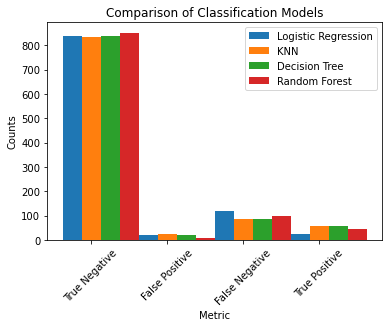

In [47]:
# Create visualization comparing models confusion matrices
# Confusion matrices
cm_logistic = np.array([[838, 19], [119, 24]])
cm_knn = np.array([[832, 25], [85, 58]])
cm_decision_tree = np.array([[838, 19], [87, 56]])
cm_random_forest = np.array([[851, 6], [99, 45]])

  
# Labels for the groups
group_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Data preparation
tn_logistic, fp_logistic, fn_logistic, tp_logistic = cm_logistic.ravel()
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
tn_dt, fp_dt, fn_dt, tp_dt = cm_decision_tree.ravel()
tn_rf, fp_rf, fn_rf, tp_rf = cm_random_forest.ravel()

logistic_values = [tn_logistic, fp_logistic, fn_logistic, tp_logistic]
knn_values = [tn_knn, fp_knn, fn_knn, tp_knn]
decision_tree_values = [tn_dt, fp_dt, fn_dt, tp_dt]
random_forest_values = [tn_rf, fp_rf, fn_rf, tp_rf]

# Number of groups
n_groups = 4

# Create bar plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25

rects1 = ax.bar(index, logistic_values, bar_width, label='Logistic Regression')
rects2 = ax.bar(index + bar_width, knn_values, bar_width, label='KNN')
rects3 = ax.bar(index + 2 * bar_width, decision_tree_values, bar_width, label='Decision Tree')
rects4 = ax.bar(index + 3 * bar_width, random_forest_values, bar_width, label='Random Forest')

ax.set_xlabel('Metric')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Classification Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(group_labels)
ax.legend()

plt.xticks(rotation=45)
plt.show()


# Model Selection and Tuning 

**Random Forest** was chosen for  several reasons based on an analysis of model performances:

- It achieved  a high recall,the highest precision, F1, and accuracy scores among the models evaluated.
- It had the second-highest AUC score out of the four models considered.
- Although Random Forest did not excel the most in identifying positive predictions, as shown in the confusion matrix, it ranked second in this area and had the second-highest number of true negatives 
* Multiple uncorrelated variable 
*  Easy to evaluate variable importance or contribution to model
* Reduce risk of overfitting 

**Hyperparameter Tuning** 

- GridSearchCV: to obtain the best parameters for the model 


In [48]:
# Baseline random forest parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [49]:
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state':[42]
}


In [50]:
# Instantiate GridSearchCV
rf_grid_search = GridSearchCV (rf,rf_param_grid,cv=3 )
# Fit to the data
rf_grid_search.fit(X_train_scaled, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 90.40%

Optimal Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}


In [51]:
rf_score = rf_grid_search.score(X_test_scaled, y_test)
print("Random forest grid search: ", rf_score)

Random forest grid search:  0.909


In [52]:
# Update the model with optimal parameters 
model_rf = RandomForestClassifier(criterion= 'gini', max_depth= None, min_samples_leaf= 3, 
                                  min_samples_split= 5, n_estimators= 100, bootstrap=False, max_features= 'auto', random_state= 42)
model_rf.fit(X_train_scaled, y_train) 
grid_hat_train=model_rf.predict(X_train_scaled)
y_pred_grid = model_rf.predict(X_test_scaled) 

In [53]:
# Update Random Forest snapshot of comprehensive metrics
classification_report_test = classification_report(y_train,grid_hat_train)
print("Classification Report (Training Set):\n", classification_report_test)

classification_report_test = classification_report(y_test, y_pred_grid)
print("Classification Report (Testing Set):\n", classification_report_test)


# Calculate evaluation metrics with confusion matrices 
# Print confusion matrix
cm_model_rf = confusion_matrix(y_test,y_pred_grid )
print('Confusion Matrix:\n', cm_model_rf)


Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1993
           1       1.00      0.81      0.90       340

    accuracy                           0.97      2333
   macro avg       0.98      0.91      0.94      2333
weighted avg       0.97      0.97      0.97      2333

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.80      0.49      0.61       143

    accuracy                           0.91      1000
   macro avg       0.86      0.73      0.78      1000
weighted avg       0.90      0.91      0.90      1000

Confusion Matrix:
 [[839  18]
 [ 73  70]]


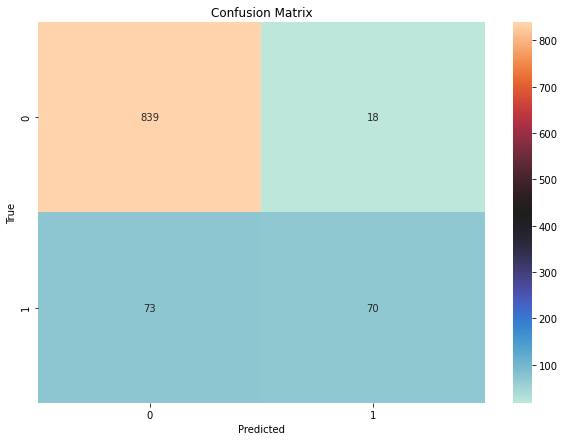

In [54]:
# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_model_rf, annot=True, fmt='g', cmap='icefire') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Evalute using the AUC ROC curve
# First calculate the probability scores of each of the datapoints:
y_score = model_rf.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_grid)
roc_auc=auc(false_positive_rate, true_positive_rate)
# Print AUC
print('AUC Random Forest model_rf: {}'.format(auc(false_positive_rate, true_positive_rate)))

AUC Random Forest model_rf: 0.7342534944635295


AUC Random Forest model_rf: 0.7342534944635295


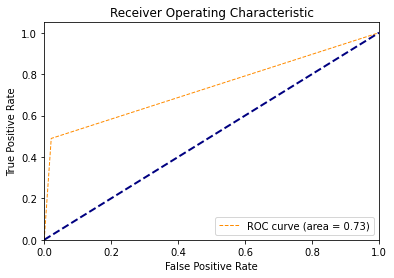

In [56]:
# Probability scores for test set
y_score = model_rf.predict_proba(X_test_scaled)
# Check the AUC of predictions
# False positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_grid)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('AUC Random Forest model_rf: {}'.format(auc(false_positive_rate, true_positive_rate)))

# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=1,linestyle='--' ,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Model Improvement Analysis 


## Model Performance Comparison

| Metric    | rf   | model_rf | Difference (%)  |
|-----------|------|----------|-----------------|
| Precision | 0.88 | 0.80     | -9.09%          |
| Recall    | 0.31 | 0.49     | +58.06%         |
| F1-score  | 0.46 | 0.61     | +32.61%         |
| Accuracy  | 90%  | 91%      | +1.11%          |
|AUC Score  |0.65  |  0.73    | +12.31%           |



**Precision**
* The rf model has a higher precision (0.88) compared to model_rf (0.80)indicting it's better at ensuring that when it predicts a positive result or churn, it is likely correct. 
*  model_rf shows a decrease in precision by 9.09%, which suggest it has a higher tendency to classify not-churn(negatives) cases as churn(positives), compared to rf.

**Recall**
* The recall of model_rf is 0.49, 58.06% higher than that of rf at 0.31. 
* model_rf is better at identifying actual positive cases overall. 
* It does not miss as many positives/churn as rf, making it a preferable model for the SyriaTel business problem 

**F1-Score**
* F1-score combines precision and recall into a single metric by taking their harmonic mean. 
* model_rf has a higher F1-score (0.61) than rf (0.46),  32.61% improvement reflecting a better balance between precision and recall. 
* improvement suggests that model_rf is more robust in balancing  between missing churns and maintaining reasonable accuracy in those predictions.

**Accuracy**
* model_rf shows a slight improvement (91%) over rf (90%), with a marginal increase of 1.11%.
* This suggests that model_rf makes correct predictions on a slightly higher percentage of the total dataset.

**AUC Score**
* AUC score improved by approximately 12.31%. 
* significant model  improvement, suggesting model_rf effectively enhances predictive performance.

## Confusion Matrix Comparison

| Model        | True Negatives (TN) | False Positives (FP) | False Negatives (FN) | True Positives (TP) |
|--------------|---------------------|----------------------|----------------------|---------------------|
| **rf**       | 851                 | 6                    | 98                   | 45                  |
| **model_rf** | 839                 | 18                   | 73                   | 70                  |


* TN are slightly lower at 839, indicating a slight drop in correctly identifying negative cases.
* FP increase to 18, suggesting this model is more aggressive in predicting positives but  with associated errors 
* FN are reduced to 73, indicating better performance in catching positive cases compared to rf.
* Significantly higher TP at 70, suggesting better effectiveness at identifying positive cases.


**Feature importance**
*  Examine the importance of each feature in the  model. 
* Check the feature_importances_ attribute of the trained model 

In [57]:
# Feature importance
feature_importances = model_rf.feature_importances_
# Extract feature names
feature_names = X_train_scaled.columns

feature_importances = pd.Series(
    model_rf.feature_importances_, index=feature_names
).sort_values(ascending=True)

feature_importances

area code_408             0.004551
area code_510             0.004961
area code_415             0.008124
voice mail plan_no        0.026859
voice mail plan_yes       0.028602
total night charge        0.061461
international plan_no     0.063774
total night minutes       0.064528
international plan_yes    0.065110
total intl charge         0.067571
total intl minutes        0.074507
total eve minutes         0.097512
total eve charge          0.100384
total day charge          0.164814
total day minutes         0.167243
dtype: float64

<Figure size 576x720 with 0 Axes>

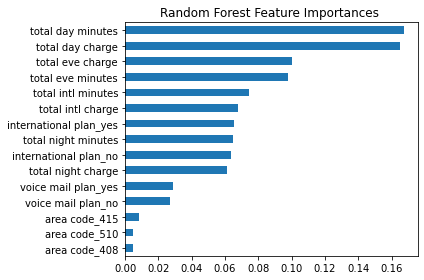

<Figure size 576x720 with 0 Axes>

In [58]:
# Visualize ranked feature importances 
ax = feature_importances.plot.barh()
ax.set_title("Random Forest Feature Importances ")
ax.figure.tight_layout()
plt.figure(figsize=(8,10))

# Analysis of the feature importances revealed the following:

**Daytime  usage**
- Total Day Minutes( 0.167243) highest feature importance in the model, suggesting that the number of minutes customers use during the day is highly predictive of customer propensity to churn. 
- Total Day Charge(0.164814) is ranked second .
- The amount of usage and the associated charges during the day are significant predictors of customer behavior.
-  Customers who use the service heavily during the day are crucial for the model's predictions
- Day rate = 0.17

**Evening time usage** 
- Total Evening Charge(0.100384)  is ranked third 
- Associated Total Evening Minutes (0.097512 ) follows.
- Evening time usage is highly important indicating  another critical factor in predicting customer behavior. 
- These features are slightly less important than daytime usage but still play a major predictor of customer churn.
- Evening rate= 0.085


**International usage and plan** 
- Total International Minutes (0.074507) and Total International Charge (0.067571) are also important, further emphasizing the relevance of usage in predicting customer behavior.
- International Plan Yes (0.065110) and International Plan No (0.063774) ranking indicates that subscribers opting for or against this add-on service has significant impact on churn. 
-  10.38% of subscribers utilize international plan 
- 39.56% of international plans subscribers terminate the service indicating distinctive pattern of churn behavior compared to those without the plan.


**Night time usage** 
- Total Night Minutes (0.064528) and Total Night Charge (0.061461)  as indicators of night time usage are less important than day time usage, evening and international usage.
- Night rate = 0.045

**Voice mail Plan** 
- Voice Mail Plan Yes (0.028602) and Voice Mail Plan No (0.026859) importance is ranked low but subscribers participation in this plan or not  still influences customer behavior 

**Geographical location**
- The least important features of the model are the area codes:Area Code 415 (0.008124), Area Code 510 (0.004961), and Area Code 408 (0.004551) 
- Geographical location has minimal impact on customer propensity to churn 

# Predictive Recommendations

Based on the above analysis the following predictive recommendation are proposed:

1. Concentrated Usage Analysis

    - Accurate and meticulous data collection for daytime usage, the highest ranking importance
    - Employ detailed analysis of usage patterns, including  rate structure for different times of day. Currently evening rate is  approximately 50% cheaper than day rate while night rate is 74% cheaper
    - Recognize customers are inclined to use the service more during the daytime making daytime usage the best predictor of subscribers intentions to terminate service.
    - Allocate resources to track and analyze daytime usage patterns to optimize identification of high-risk customers and employ mitigation strategies to ensure retention.


2. Customer Segmentation

    - Plan types impacts  prediction,voicemail plans to a lesser extent. Understanding how different plans influence customer behavior can help tailor retention strategies.
    - Utilize insights on plan types and usage patterns to segment customers effectively and target high-risk groups with tailored interventions
    

3. Invest in Subscription Analytics

    - Acquire dashboards to monitor high-importance features in real-time, allowing for proactive measures to prevent churn
    

4. Survey customers at the point of cancel

    - Utilize churn survey to gather data to understand why customers cancel their accounts.
    - Survey can identify issues and improve SyriaTel product